# 2D Poisson equation, Finite Difference
_Gilbert François Duivesteijn_

The generic convection-diffusion equation can be written as

\begin{align}
\frac{\partial u}{\partial t} + U \cdot \nabla u = \kappa \nabla^2 u + f
\end{align}
where
\begin{align}
 \nabla^2 &\equiv \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} \\
   \nabla &\equiv \left( \frac{\partial}{\partial x}, \frac{\partial}{\partial y} \right)
\end{align}
and $U$, $\kappa > 0$, $f$ given functions of $(x,y)$. 

When the solution is constant over time $\frac{\partial u}{\partial t} = 0$ and the convection term $U=0$, we get the elliptic Poisson equation:

\begin{align}
\kappa \nabla^2 u + f = 0
\end{align}

Let's assume the following Dirichlet boundary conditions:

\begin{align}
u(0,y) = u(L, y), u(x, 0) = u(x, L) = 0.
\end{align}
and define $f$ as
\begin{align}
f(x,y) = -\sin(x)\cos(y)
\end{align}

Discretizing around $i,j$ gives:

\begin{align}
\kappa \left( \frac{u_{i-1,j}-2u_{i,j}+u_{i+1,j}}{\Delta x^2} + \frac{u_{i,j-1}-2u_{i,j}+u_{i,j+1}}{\Delta y^2}\right) + f(x,y) = 0
\end{align}

As a computational domain $\Omega$, we take a unit square, with $nx$ nodes in $x$-direction and $ny$ nodes in $y$-direction, including boundary nodes.
<img src="./assets/2d_discretization.png" width=500>

With $nx=5$ and $ny=5$, there are $3 \times 3$ internal nodes. 

The discretization matrix $A$ will be of size $9 \times 9$

\begin{align}
\kappa \begin{bmatrix}
\frac{-2}{\Delta x^2}+\frac{-2}{\Delta y^2} & \frac{1}{\Delta x^2} & 0 & \frac{1}{\Delta y^2} & 0 & 0 & 0 & 0 & 0 \\
\frac{1}{\Delta x^2} & \frac{-2}{\Delta x^2}+\frac{-2}{\Delta y^2} & \frac{1}{\Delta x^2} & 0 & \frac{1}{\Delta y^2} & 0 & 0 & 0 & 0 \\
0 & \frac{1}{\Delta x^2} & \frac{-2}{\Delta x^2}+\frac{-2}{\Delta y^2} & 0 & 0 & \frac{1}{\Delta y^2} & 0 & 0 & 0 \\
\frac{1}{\Delta y^2} & 0 & 0 & \frac{-2}{\Delta x^2}+\frac{-2}{\Delta y^2} & \frac{1}{\Delta x^2} & 0 & \frac{1}{\Delta y^2} & 0 & 0 \\
0 & \frac{1}{\Delta y^2} & 0 & \frac{1}{\Delta x^2} & \frac{-2}{\Delta x^2}+\frac{-2}{\Delta y^2} & \frac{1}{\Delta x^2} & 0 & \frac{1}{\Delta y^2} & 0 \\
0 & 0 & \frac{1}{\Delta y^2} & 0 & \frac{1}{\Delta x^2} & \frac{-2}{\Delta x^2}+\frac{-2}{\Delta y^2} & 0 & 0 & \frac{1}{\Delta y^2} \\
0 & 0 & 0 & \frac{1}{\Delta y^2} & 0 & 0 & \frac{-2}{\Delta x^2}+\frac{-2}{\Delta y^2} & \frac{1}{\Delta x^2} & 0 \\
0 & 0 & 0 & 0 & \frac{1}{\Delta y^2} & 0 & \frac{1}{\Delta x^2} & \frac{-2}{\Delta x^2}+\frac{-2}{\Delta y^2} & \frac{1}{\Delta x^2} \\
0 & 0 & 0 & 0 & 0 & \frac{1}{\Delta y^2} & 0 & \frac{1}{\Delta x^2} & \frac{-2}{\Delta x^2}+\frac{-2}{\Delta y^2} \\
\end{bmatrix} \cdot
\begin{bmatrix}
u_{11} \\
u_{12} \\
u_{13} \\
u_{21} \\
u_{22} \\
u_{23} \\
u_{31} \\
u_{32} \\
u_{33} \\
\end{bmatrix} + 
\begin{bmatrix}
f_{11} \\
f_{12} \\
f_{13} \\
f_{21} \\
f_{22} \\
f_{23} \\
f_{31} \\
f_{32} \\
f_{33} \\
\end{bmatrix} = 0
\end{align}



In [73]:
%matplotlib inline

In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
# nx, ny denotes the number of nodes, including the boundaries.
# Set these values to 5, to follow the written text above. However, you can refine the resolution by setting e.g. nx = xy = 128.
# Also try asymmetric discretization, e.g. nx = 64, ny = 32.
nx = 128
ny = 128

In [76]:
dx = 1/(nx-1)
dy = 1/(ny-1)
print(f"dx={dx:.3f}, dy={dy:.3f}")

dx=0.008, dy=0.008


In [77]:
# Create block for one row i, all columns j.

# u_{i,j}
diag_block = np.eye(nx-2)*(-2/dx**2 + -2/dy**2)
# u_{i+1, j}
diag_block = diag_block + np.diag(np.ones(shape=(nx-3,))*1/dx**2, 1)
# u_{i-1,j}
diag_block = diag_block + np.diag(np.ones(shape=(nx-3,))*1/dx**2, -1)

In [78]:
%%time
# Create blocks for all rows
A = np.kron(np.eye(ny-2), diag_block)

CPU times: user 679 ms, sys: 748 ms, total: 1.43 s
Wall time: 1.42 s


In [79]:
# u_{i, j+1}
A = A + np.diag(np.ones((nx-2)*(ny-3),)*1/dy**2, nx-2)
# u_{i, j-1}
A = A + np.diag(np.ones((nx-2)*(ny-3),)*1/dy**2, -(nx-2))
print(A)
print(f"\nA shape (rows, cols): {A.shape}")

[[-64516.  16129.      0. ...      0.      0.      0.]
 [ 16129. -64516.  16129. ...      0.      0.      0.]
 [     0.  16129. -64516. ...      0.      0.      0.]
 ...
 [     0.      0.      0. ... -64516.  16129.      0.]
 [     0.      0.      0. ...  16129. -64516.  16129.]
 [     0.      0.      0. ...      0.  16129. -64516.]]

A shape (rows, cols): (15876, 15876)


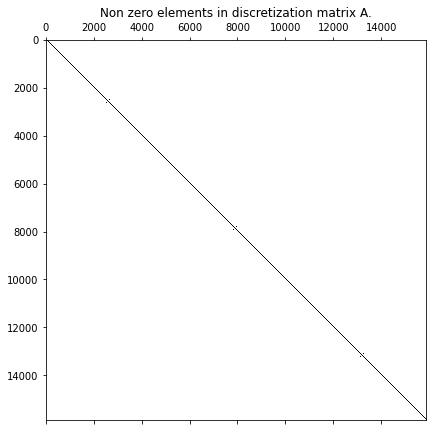

In [80]:
plt.figure(figsize=(7,7))
plt.spy(A)
plt.title("Non zero elements in discretization matrix A.")
plt.show()

In [81]:
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)

In [82]:
xx, yy = np.meshgrid(x, y)
def fn(x, y):
    return -np.sin(x)*np.cos(y)

In [83]:
# Compute the values of F(x,y) for all nodes, including boundary nodes.
F = fn(xx, yy)

# Take the inner nodes of F(x,y) for solving the PDE.
b = -F[1:-1,1:-1]
# Reshape b into a 1D vector to match the dimensions of matrix A 
b = b.reshape(-1)

In [84]:
%%time

# Solve the PDE
u = np.linalg.solve(A, b)

CPU times: user 1min 56s, sys: 10.9 s, total: 2min 7s
Wall time: 7.37 s


In [85]:
# Reshape the solution u to 2D to match the inner nodes of Omega and add boundary values to u.
u = u.reshape(ny-2, nx-2) 

# Add boundary values to solution u, (Omega_b = 0)
ub = np.zeros(shape=(ny, nx))
ub[1:ny-1,1:nx-1] = u
u = ub

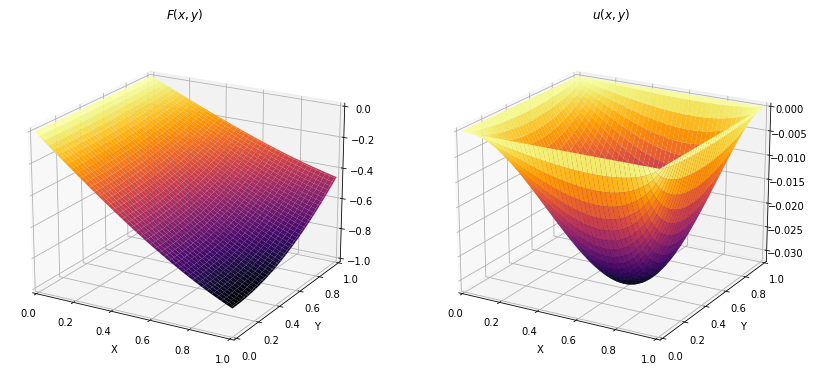

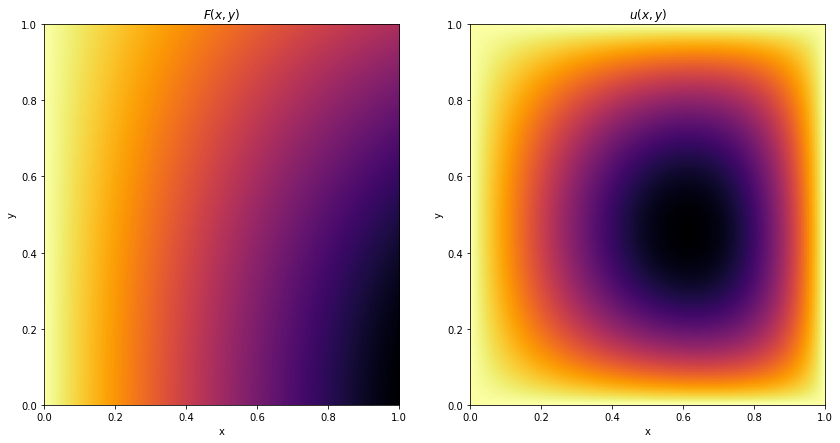

In [86]:
# 3D plots

fig, ax = plt.subplots(1, 2, subplot_kw={"projection": "3d"}, figsize=(14, 7))
ax[0].plot_surface(xx, yy, F, cmap="inferno", linewidth=1, antialiased=True)
# fig.colorbar(surf, shrink=0.5, aspect=5)
ax[0].view_init(20, -60)
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)

ax[0].set_zlim(-1, 0)
ax[0].set_title("$F(x, y)$")
ax[0].set_xlabel("X")
ax[0].set_ylabel("Y")

ax[1].plot_surface(xx, yy, u, cmap="inferno", linewidth=1, antialiased=True)
# fig.colorbar(surf, shrink=0.5, aspect=5)
ax[1].view_init(20, -60)
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)
ax[1].set_title("$u(x, y)$")
ax[1].set_xlabel("X")
ax[1].set_ylabel("Y")

plt.show()

# 2D plots

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].imshow(F, cmap="inferno", origin="lower", aspect="auto", extent=[0, 1, 0, 1])
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].set_title("$F(x,y)$")
axs[1].imshow(ub, cmap="inferno", origin="lower", aspect="auto", extent=[0, 1, 0, 1])
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].set_title("$u(x,y)$")
plt.show()

